In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [26]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [27]:
#One Hot Encoding : City , Type
#Ordinal Ecnoder : City Group
#P1 -> P37 Normalization
#Delete : Id , Open Date

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [29]:
numerical_col = data.select_dtypes(exclude=['object']).columns
categorical_col = data.select_dtypes(include=['object']).columns

In [30]:
data.shape

(137, 43)

In [31]:
test_data.shape

(100000, 42)

# Preprocessing

In [32]:
data.columns[data.isna().any()].tolist()

[]

In [33]:
data['Open Date'] = pd.to_datetime(data['Open Date'], format='%m/%d/%Y')
data['Open Days'] = ""

In [35]:
dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2018'], [len(data)])})
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')
dateLastTrain

,Date
0,2018-01-01
1,2018-01-01
2,2018-01-01
3,2018-01-01
4,2018-01-01
...,...
132,2018-01-01
133,2018-01-01
134,2018-01-01
135,2018-01-01


In [37]:
data['Open Days'] = dateLastTrain['Date'] - data['Open Date']
data['Open Days'] = data['Open Days'].astype('timedelta64[D]').astype(int)
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open Days
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,0,5787594.0,3477
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,9262754.0,4099
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,2544857.0,4195
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,0,7217634.0,2621


In [39]:
data['Open Days'].dtype

dtype('int64')

In [42]:
city_type = data[['City Group', 'revenue']].groupby(['City Group'], as_index=False).mean()
city_type

,City Group,revenue
0,Big Cities,4.983480e+06
1,Other,3.752924e+06


<Axes: xlabel='City Group', ylabel='revenue'>

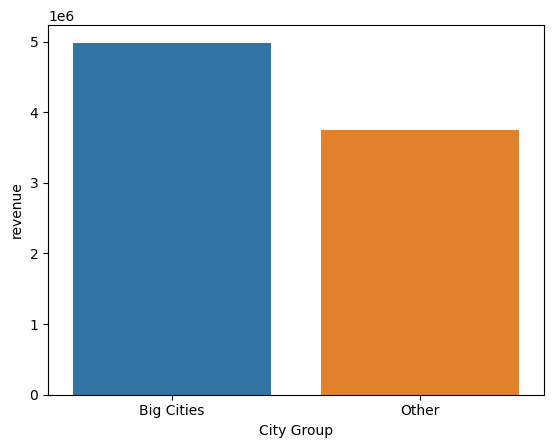

In [43]:
sns.barplot(x='City Group', y='revenue', data= city_type)

<Axes: xlabel='City', ylabel='revenue'>

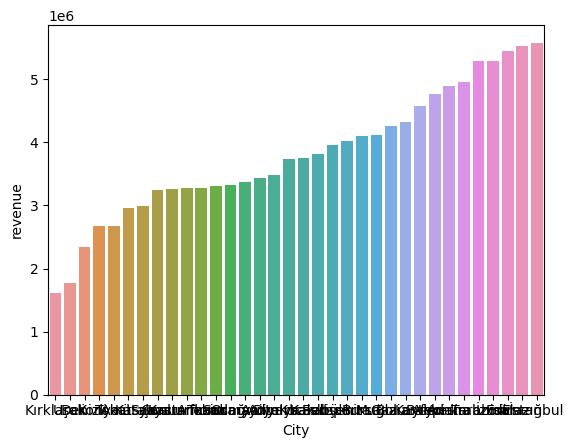

In [46]:
cities = data[['City', 'revenue']].groupby(['City'], as_index=False).mean().sort_values(['revenue'])
sns.barplot(x='City', y='revenue', data= cities)